In [44]:
import sys, os
import numpy as np
import cv2
from keras.models import load_model
import matplotlib.pyplot as plt
import requests

In [45]:
MODELPATH = './models/model3.h5'
model = load_model(MODELPATH)

In [52]:
emotion_dict = {0: "Angry", 1: "Disgust", 2: "Fear", 3: "Happy", 4: "Sad", 5: "Surprise", 6: "Neutral"}
feelings_faces = []
emotions = []
timearr = []


cap = cv2.VideoCapture('kiki.mp4')
frame_counter = 0
#print(int(cap.get(cv2.CAP_PROP_FRAME_COUNT)))
while cap.isOpened():
    ret, frame = cap.read()
    frame_counter += 1
    #If the last frame is reached
    if frame_counter >= int(cap.get(cv2.CAP_PROP_FRAME_COUNT)):
        frame_counter = 0 #Or whatever as long as it is the same as next line
        break
    if not ret: break
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 1)
        roi_gray = gray[y:y + h, x:x + w]
        cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray, (48, 48)), -1), 0)
        cv2.normalize(cropped_img, cropped_img, alpha=0, beta=1, norm_type=cv2.NORM_L2, dtype=cv2.CV_32F)
        prediction = model.predict(cropped_img)
        emotions.append(int(np.argmax(prediction)))
        timearr.append(frame_counter)
        cv2.putText(frame, emotion_dict[int(np.argmax(prediction))], (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 1, cv2.LINE_AA)
        #emoji_face = feelings_faces[int(np.argmax(prediction))]
    cv2.imshow('frame', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

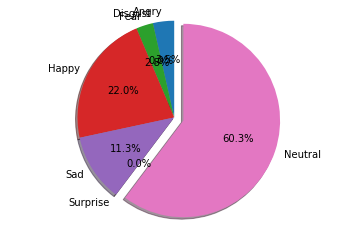

In [51]:
sizes = []
explode = []
for i in emotion_dict:
    sizes.append(emotions.count(i))
    explode.append(0)
    
# print(sizes)
# Pie chart, where the slices will be ordered and plotted counter-clockwise:

# print(max(enumerate(sizes),key=lambda x: x[1])[0])
explode[max(enumerate(sizes),key=lambda x: x[1])[0]] = 0.1

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=emotion_dict.values(), autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show() 